<h1> The Analysis of Beeradvocate.com User Beer Reviews  </h1>

My final project for **UCSanDiegoX: DSE200x Python for Data Science** was an analysis of a dataset containing ~1.5 million user reviews of beers from the website beeradvocate.com. The reviews span over 10 years, up to and including November 2011.

The reviews includes ratings in terms of aspects such as appearance, aroma, palate, taste, and overall impression of the beer, as well as the beer name, brewery, username of the reviewer, and timestamp of the review.

<h2> Data Inspection </h2>

The first thing to do before formulating any research questions is to do some exploratory data analysis (EDA).

In [1]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from scipy.stats import ttest_ind, f_oneway # statistical tests
import chardet  # for unknown encodings
from collections import Counter # instead of FOR loops

In [2]:
## import dataset into Pandas DataFrame
beer = pd.read_csv('C:/ml/beer_reviews.csv')
beer.shape

(1586614, 13)

We see that we indeed have over one and a half million reviews, as well as 13 different variables in the dataset. Let's find out how many unique beers there are by finding out what signifies a unique beer.

In [3]:
beer.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


So we can see we have both names and ID numbers for both breweries and beers, as well as reviewer usernames, a timestamp field of the review, the beer's style, name, and alcohol by volume % (ABV), and finally review scores for different characteristics of a beer, such as appearance, aroma, palate, and taste, and then an overall score of the beer.

We can check how many unique beer ID's we have to see how many beers we have in the dataset.

In [4]:
len(beer['beer_beerid'].value_counts())

66055

Just over 66 thousand beers. Cool.

Now we need to check for any null values in the dataset that may impact any analysis.

In [5]:
beer[beer.isnull().any(axis=1)]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
273,1075,Caldera Brewing Company,1103668195,3.0,3.0,3.0,RedDiamond,American Stout,4.0,3.0,Cauldron Espresso Stout,NaN,21241
430,850,Moon River Brewing Company,1110736110,3.5,4.0,4.5,cMonkey,Scotch Ale / Wee Heavy,3.5,3.5,The Highland Stagger,NaN,20689
603,850,Moon River Brewing Company,1100038819,4.0,3.5,4.0,aracauna,Scotch Ale / Wee Heavy,3.5,3.5,The Highland Stagger,NaN,20689
733,1075,Caldera Brewing Company,1260673921,4.0,4.0,4.0,plaid75,American IPA,4.0,4.0,Alpha Beta,NaN,54723
798,1075,Caldera Brewing Company,1212201268,4.5,4.5,4.0,grumpy,American Double / Imperial Stout,4.0,4.5,Imperial Stout,NaN,42964
927,2724,Pacific Coast Brewing Company,1293559076,1.0,1.5,3.0,womencantsail,American Strong Ale,2.5,1.5,Megalodon,NaN,64803
944,2724,Pacific Coast Brewing Company,1205614154,1.5,2.0,1.5,JDV,Belgian Strong Pale Ale,1.0,3.0,Holiday Trappist Style Ale,NaN,41584
960,2724,Pacific Coast Brewing Company,1215743407,4.0,3.5,4.0,hoegaardenhero,American Amber / Red Ale,4.5,3.5,Emerald Ale,NaN,37498
961,2724,Pacific Coast Brewing Company,1203379699,4.0,4.0,4.0,barleywinefiend,American Amber / Red Ale,4.0,4.0,Emerald Ale,NaN,37498
962,2724,Pacific Coast Brewing Company,1183260774,4.0,4.0,4.5,Mark,American Amber / Red Ale,4.5,4.0,Emerald Ale,NaN,37498


So it seems the only field that has null values in it is **beer_abv**, or the beer's alcohol by volume (ABV) as a percentage. For the research questions I've been formulating so far, I don't believe I'll need this field, so I'll make sure to focus on analysis that don't involve ABV.

I want to focus on the beer *style*, and use that to designate certain beers depending on what country that style originated from so that I can compare different country's beers in such a manner.

In [6]:
beer[beer['beer_style'].isnull()]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid


Great, so I actually have a beer style for each review record in this dataset. Now I need to get the unique beer styles and figure out which country they originated from.

In [7]:
## get all unique beer styles
beer['beer_style'].groupby(beer['beer_style']).value_counts().head()

beer_style                  beer_style                
Altbier                     Altbier                        7741
American Adjunct Lager      American Adjunct Lager        30749
American Amber / Red Ale    American Amber / Red Ale      45751
American Amber / Red Lager  American Amber / Red Lager     9311
American Barleywine         American Barleywine           26728
Name: beer_style, dtype: int64

So I want to write this to a CSV and manually record the country of origin for these styles via Google. There may be a quicker and more technical solution to this issue, but I don't want to deal with that right now.

In [8]:
#beer['beer_style'].groupby(beer['beer_style']).value_counts().to_csv('beer_styles.csv',sep=',')

Now let's look at this dataset with my labels added.

In [9]:
with open('beer_origins.csv', 'rb') as f:
    result = chardet.detect(f.read())

beer_origin = pd.read_csv('./beer_origins.csv', encoding=result['encoding'])
beer_origin.head()

,beer_style,beer_origin
0,American Adjunct Lager,USA
1,American Amber / Red Ale,USA
2,American Amber / Red Lager,USA
3,American Barleywine,USA
4,American Black Ale,USA


Now we need to add this field back into the original dataset.

In [10]:
beers_with_origin = pd.merge(beer, beer_origin, on='beer_style')
beers_with_origin.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,beer_origin
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,German
1,9020,Yazoo Brewing Company,1224350360,4.0,4.0,3.0,Likeburning,Hefeweizen,4.0,3.5,Hefeweizen,5.0,20575,German
2,1454,Broad Ripple Brew Pub,1316545215,4.0,3.5,3.0,JamesS,Hefeweizen,4.0,4.5,Hefe Weizen,4.5,73291,German
3,850,Moon River Brewing Company,1133896338,3.5,3.5,3.0,GusterFan,Hefeweizen,3.0,3.5,Wheezy Heifer,5.5,27229,German
4,850,Moon River Brewing Company,1193191936,4.0,4.0,3.5,harpo111,Hefeweizen,3.5,3.5,Hefe-Weizen,5.5,2776,German


<h3> *NOTE* </h3>

There were certain styles that were too general of a style, so I labeled them as **General**. For example:

In [11]:
beers_with_origin['beer_name'][beers_with_origin['beer_origin'] == 'General'].value_counts().head(10)

#9                                   1442
Midas Touch Golden Elixir            1433
Bud Light                            1302
Samuel Adams Old Fezziwig Ale        1230
Coors Light                          1157
Samuel Adams Cherry Wheat            1107
Miller Lite                          1082
Samuel Smith's Winter Welcome Ale    1017
Éphémère (Apple)                      932
Samuel Adams Cranberry Lambic         918
Name: beer_name, dtype: int64

In [12]:
beers_with_origin['beer_style'][beers_with_origin['beer_name'] == 'Bud Light'].head(1)

166297    Light Lager
Name: beer_style, dtype: object

So we can't really pinpoint what country "light lager" is from, so for such beer styles, we will ignore them in this analysis just to focus on beer styles that have a definitive origin.

Therefore, we want to remove the 'General' beer_origin values before plotting our data

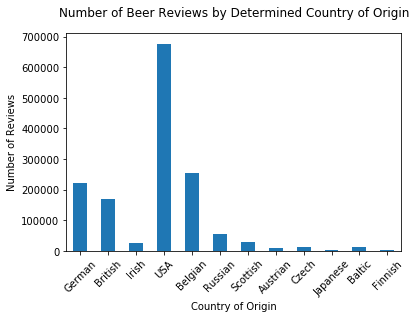

In [13]:
%matplotlib inline

## count reviews for each beer origin whilst ignoring beer_origin value of 'General'
origin_counts = Counter(beers_with_origin['beer_origin'][beers_with_origin['beer_origin'] != 'General'])

## convert dictionary of origin counts to DataFrame
origins_df = pd.DataFrame.from_dict(origin_counts, orient='index')

## Plot value counts of each origin
origins_df.plot(kind='bar',legend=None)
plt.xticks(rotation=45)
plt.xlabel('Country of Origin')
plt.ylabel('Number of Reviews') 
plt.title('Number of Beer Reviews by Determined Country of Origin', y=1.05)

plt.show()

See we can see a large disparity in the number of reviews for origin. USA, Belgian, German, and British beers are noticeably higher.

So let's cut this histogram down into just those origins.

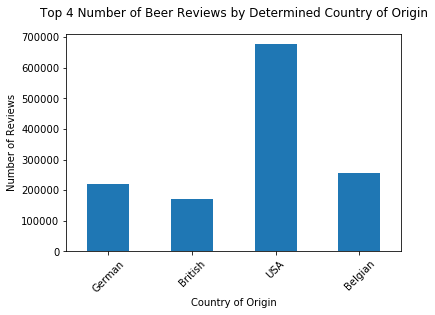

In [14]:
## get origins where number of reviews is greater than one hundred thousand
origins_df_high = origins_df[origins_df[0] > 100000]

origins_df_high.plot(kind='bar',legend=None)
plt.xticks(rotation=45)
plt.xlabel('Country of Origin')
plt.ylabel('Number of Reviews') 
plt.title('Top 4 Number of Beer Reviews by Determined Country of Origin', y=1.05)

plt.show()

<h1> Primary Research Questions </h1>


My primary research question that I have developed from my EDA is whether there is a significant difference in the ratings of US, German, and Belgian-style beers, as they were the top 3 origins for number of reviews.

I also have 2 additional questions of whether overall scores of US beer have increased over time (seeing as we have had a large boom in microbrewing and craft beers, leading to a sort of revolution of quality beers) and which qualities, if any, (from aroma, taste, appearance, palate) significantly affect the overall score of a beer.

<h2> Comparison of German, US, and Belgian Beer Reviews </h2>

So, the first thing to do is to subset our DataFrame into 3 new DataFrames, one each for those reviews of beers with origin values of Germany, US, or Belgium, and plotting out the distribution of their overall scores.

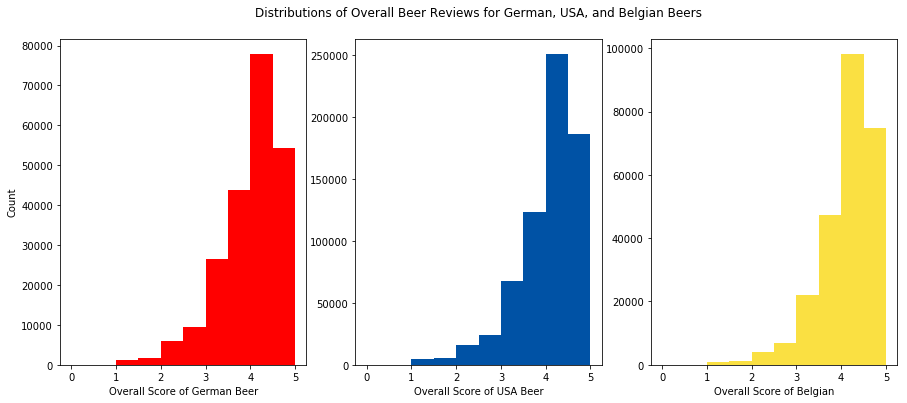

In [15]:
## subset reviews
german_beer_reviews = beers_with_origin['review_overall'][beers_with_origin['beer_origin'] == 'German']
us_beer_reviews = beers_with_origin['review_overall'][beers_with_origin['beer_origin'] == 'USA']
belgian_beer_reviews = beers_with_origin['review_overall'][beers_with_origin['beer_origin'] == 'Belgian']

## plot distributions
fig, axes = plt.subplots(1, 3, figsize=(15,6)) 

axes[0].hist(german_beer_reviews, 10, facecolor = '#ff0000')
axes[0].set_xlabel('Overall Score of German Beer')
axes[0].set_ylabel('Count')

axes[1].hist(us_beer_reviews, 10, facecolor = '#0052A5')
axes[1].set_xlabel('Overall Score of USA Beer')
# set title for whole plotting area (over center plot)
axes[1].set_title('Distributions of Overall Beer Reviews for German, USA, and Belgian Beers', y = 1.05)

axes[2].hist(belgian_beer_reviews, 10, facecolor = '#FAE042')
axes[2].set_xlabel('Overall Score of Belgian')

plt.show()

Noting the large range in number of reviews for each plots y-axis, I've got some *preeetty* skewed distributions (also notice how the yellow Belgian bars are reminiscent of the country's wonderful french fries, which I totally planned beforehand), showing a noticeable predisposition of higher scores. So maybe the users on beeradvocate.com tend to review beers that are more likely to be "better", relatively speaking.

Or they just like most beers they happen to drink. Or they drink only "worse" beers later after imbibing a good amount in the good stuff, so they've got a smaller sample size there. Whatever. Not important now.

So, since I want to see if there's some significant difference between these populations, I want to do an [**ANOVA**](https://en.wikipedia.org/wiki/Analysis_of_variance) test, which requires normal distributions of data. It also requires similar variance for each population (AKA [**homoscedasticity**](https://en.wikipedia.org/wiki/Homoscedasticity)) and the independence of cases within the populations being compared.

To subsets the beers and be sure to get a normal distributions, we will create 3 sampling distributions from each population (3 distributions of sample means) and utilize these in our ANOVA test.

Also, we'd have the following hypothesis:
 
* **h(0): Origin of beer has no significant effect on overall beer rating by beeradvocate.com users**
* **h(a): Origin of beer has a significant effect on overall beer rating by beeradvocate.com users**

In [16]:
## create lists to hold sampling distributions
us_beer_reviews_sample = []
belgian_beer_reviews_sample = []
german_beer_reviews_sample = []

## function to create sampling distributions
def sample_beers(df_pop,df_sample):
    for i in range(0,100):
        df_sample.append(df_pop.sample(50).mean())
    return df_sample

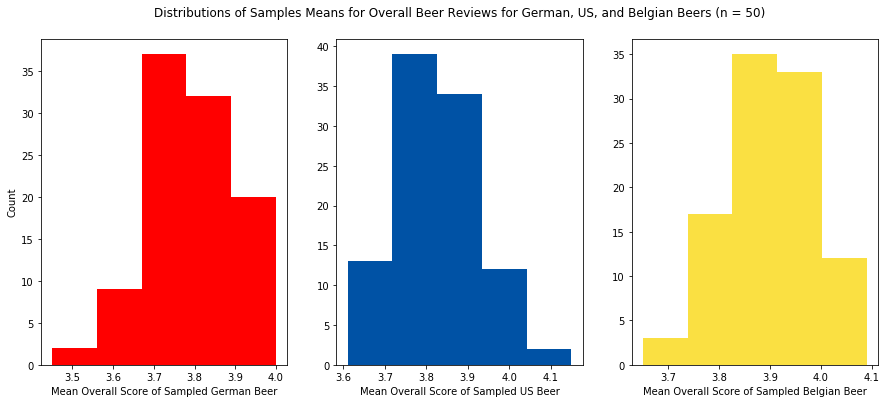

In [17]:
## create sampling distributions
sample_beers(us_beer_reviews,us_beer_reviews_sample)
sample_beers(german_beer_reviews,german_beer_reviews_sample)
sample_beers(belgian_beer_reviews,belgian_beer_reviews_sample)

## plot sampling distributions
fig, axes = plt.subplots(1, 3, figsize=(15,6)) 

axes[0].hist(german_beer_reviews_sample, 5, facecolor = '#ff0000')
axes[0].set_xlabel('Mean Overall Score of Sampled German Beer')
axes[0].set_ylabel('Count')

axes[1].hist(us_beer_reviews_sample, 5, facecolor = '#0052A5')
axes[1].set_xlabel('Mean Overall Score of Sampled US Beer')
# set title for whole plotting area (over center plot)
axes[1].set_title('Distributions of Samples Means for Overall Beer Reviews for German, US, and Belgian Beers (n = 50)', y = 1.05)

axes[2].hist(belgian_beer_reviews_sample, 5, facecolor = '#FAE042')
axes[2].set_xlabel('Mean Overall Score of Sampled Belgian Beer')

plt.show()

So this looks like we've got our normal distributions from each population. Let's look at the variances of each sample.

In [18]:
print('Sampled German Beer Variance:',np.var(german_beer_reviews_sample))
print('Sampled US Beer Variance:',np.var(us_beer_reviews_sample))
print('Sampled Belgian Beer Variance:',np.var(belgian_beer_reviews_sample))

Sampled German Beer Variance: 0.01100436
Sampled US Beer Variance: 0.01080699
Sampled Belgian Beer Variance: 0.00772851


As a general rule of thumb, if the ratio of the largest sample variance to the smallest sample variance does not exceed 1.5, the groups satisfy the requirement of homoscedasticity, so we've definitely got it. 

Now let's look at their boxplots, just for another view of the distributions.

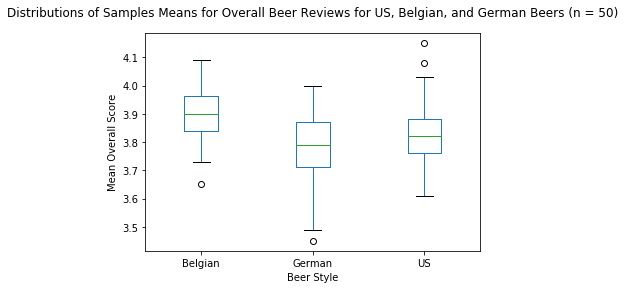

In [19]:
samples_df = pd.DataFrame({
    'German': german_beer_reviews_sample,
    'US': us_beer_reviews_sample,
    'Belgian': belgian_beer_reviews_sample})

samples_df.plot(kind = 'box')
plt.xlabel('Beer Style')
plt.ylabel('Mean Overall Score') 
plt.title('Distributions of Samples Means for Overall Beer Reviews for US, Belgian, and German Beers (n = 50)', y=1.05)

plt.show()

Looking at these box plots, I'd say it's a decent wager to claim that Belgian beers tend to be rated the highest, followed by American beers, and ending with German beers, which are still pretty highly rated with a median score close to 3.8.

For an ANOVA, we need to look at the f-distribution table. We *also* need to make sure we look at the table for an alpha ($\alpha$) level of 0.05 for a 95% confidence in our result.

Then, we need to use the **degrees of freedom *between* groups** and **degrees of freedom *within* groups**. These help measure how spaced apart sample means are and the variance within in each distribution of sample means.

We find the degrees of freedom between groups by subtracting 1 from the total number of samples we have and we find the degrees of freedom within groups by taking the total number of observations across all samples and substracting the degrees of freedom between groups from that result.

In [20]:
DFbetween = len(samples_df.columns) - 1
DFwithin = len(samples_df) - DFbetween

print('Degrees of Freedom between groups:',DFbetween,'\nDegrees of Freedom within groups:',DFwithin)

Degrees of Freedom between groups: 2 
Degrees of Freedom within groups: 98


We then use these values and the axes of the f-distributoin table to find out f-critical value (AKA the value that our f-statistic must exceed with a p-value > 0.05 to infer that one of our samples is significantly different than the others).

And to note, **df<sub>b</sub>** is the degrees of freedom between groups, and **df<sub>w</sub>** is the degrees of freedom within groups, so we'd need to look at the intersection point where df<sub>b</sub> = 2 and df<sub>w</sub> = 100, as this is the closest to our actual value of 98.

<img src="./f_table_alpha_005_marked.PNG" align="center" style="width:550px;height:550px;"/>

Looking at the f-table for our degrees of freedom, we have an f-critical value of **3.09**, which is the score our ANOVA test would need to exceed with good confidence to determine if any sampling distributions differed.

In [21]:
## compute ANOVA P value   
f_stat, p_val = f_oneway(german_beer_reviews_sample, us_beer_reviews_sample, belgian_beer_reviews_sample)
print('f-statistic:',f_stat,'\np-value:',p_val)

f-statistic: 35.1468087526 
p-value: 1.99455286049e-14


So our f-statistic is *waaaaay* above our f-critical value, and our p-value is miniscule, so we are able to **reject** our null hypothesis and conclude with confidence that there is *some* significant difference in overall beer review score based on style origin country.

We can find out *which* sampling distributions are significantly different via some t-tests. The t-critical value for a 95% confidence level ($\alpha$ = 0.05) is 2.262, so we'd need our t-statistics to be higher than this value with a significant p-value.

In [22]:
print('US vs. German t-statistic:',
      ttest_ind(us_beer_reviews_sample,german_beer_reviews_sample,equal_var=False)[0],
      'and p-value: ',ttest_ind(us_beer_reviews_sample,german_beer_reviews_sample,equal_var=False)[1]
     )
print('Belgian vs. German t-statistic:',
      ttest_ind(belgian_beer_reviews_sample,german_beer_reviews_sample,equal_var=False)[0],
      'and p-value: ',ttest_ind(german_beer_reviews_sample,belgian_beer_reviews_sample,equal_var=False)[1]
     )
print('Belgian vs. US t-statistic:',
      ttest_ind(belgian_beer_reviews_sample,us_beer_reviews_sample,equal_var=False)[0],
      'and p-value: ',ttest_ind(belgian_beer_reviews_sample,us_beer_reviews_sample,equal_var=False)[1]
     )

US vs. German t-statistic: 2.74202072584 and p-value:  0.00666584663773
Belgian vs. German t-statistic: 8.4691799955 and p-value:  6.33090310873e-15
Belgian vs. US t-statistic: 5.53967963854 and p-value:  9.84944116502e-08


So, we can infer from these results that US beer is rated significantly higher than German beers, and then Belgian beers are rated significantly higher than US beers. So it seems that Belgian beers are the most favored by beeradvocate.com users, followed by US beers.

Now, we can move on to our first secondary question, **whether or not the average US beer overall review score has increased over time.**

The first step in this analysis is to get a datetime object from our review timestamp field. Then we filter down just to those beers with a beer_origin value of "American" and group the overall review scores by year and take the average of these scores for each year.

In [23]:
## convert timestamp field to datetime and create a year field from resulting datetime object
for beer in beers_with_origin:
    beers_with_origin['review_year'] = pd.DatetimeIndex(pd.to_datetime(beers_with_origin['review_time'], unit = 's')).year

beers_with_origin.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,beer_origin,review_year
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,German,2009
1,9020,Yazoo Brewing Company,1224350360,4.0,4.0,3.0,Likeburning,Hefeweizen,4.0,3.5,Hefeweizen,5.0,20575,German,2008
2,1454,Broad Ripple Brew Pub,1316545215,4.0,3.5,3.0,JamesS,Hefeweizen,4.0,4.5,Hefe Weizen,4.5,73291,German,2011
3,850,Moon River Brewing Company,1133896338,3.5,3.5,3.0,GusterFan,Hefeweizen,3.0,3.5,Wheezy Heifer,5.5,27229,German,2005
4,850,Moon River Brewing Company,1193191936,4.0,4.0,3.5,harpo111,Hefeweizen,3.5,3.5,Hefe-Weizen,5.5,2776,German,2007


In [24]:
## get all american beer reviews and the year of the review
american_beer = beers_with_origin[['review_year','review_overall']][beers_with_origin['beer_origin'] == 'USA']
american_beer.head()

,review_year,review_overall
60834,2010,4.0
60835,2010,2.5
60836,2010,2.5
60837,2010,4.0
60838,2011,5.0


In [25]:
### Group american beer data by a variable of year
american_beer_years = american_beer.groupby('review_year')

## get Series of mean overall review scores for each year
american_beer_years_mean_score = american_beer_years['review_overall'].mean()

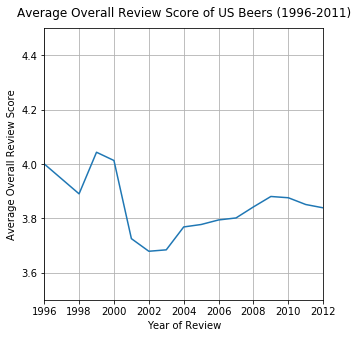

In [26]:
## plot out average overall review score by year
american_beer_years_mean_score.plot(x = 'review_year', y = 'review_overall', figsize = (5,5), grid = True)
plt.ylim([3.5,4.5])
plt.xlabel('Year of Review')
plt.ylabel('Average Overall Review Score')
plt.title('Average Overall Review Score of US Beers (1996-2011)',y=1.02)
plt.show()

So it looks the good ol' USA started out pretty high, with an average overall review score of 4, followed by a sharp drop and immediate sharp rise to its peak of 4.042857 in 1999. Then we have a *very* steep drop to the minimum average review of 3.678586 in 2002, afterwhich we have a slow and steady rise until 2009, and then we've had another slow change, but this time with a decreasing average overall review score. 

So unfortunately, US beer seems to have *not* gotten better over time, at least according to beeradvocate.com users. Or we've produced *so much beer*, that the mediocre beers have oversaturated the market and their review scores have overrun the scores resulting from the increase in quality brews that have been popping up over the country (I would know, I've tasted *a lot of them*).

Now, for the final research question: **Which qualities, if any, (from aroma, taste, appearance, palate) significantly affect the overall score of a beer**.

So what we need to do here is subset our DataFrame into just those numerical variables that could have an affect on the overall review score:

* review_aroma
* review_appearance
* review_palate
* review_taste

and then to plot the scatterplots of the overall review score vs each of these variables.

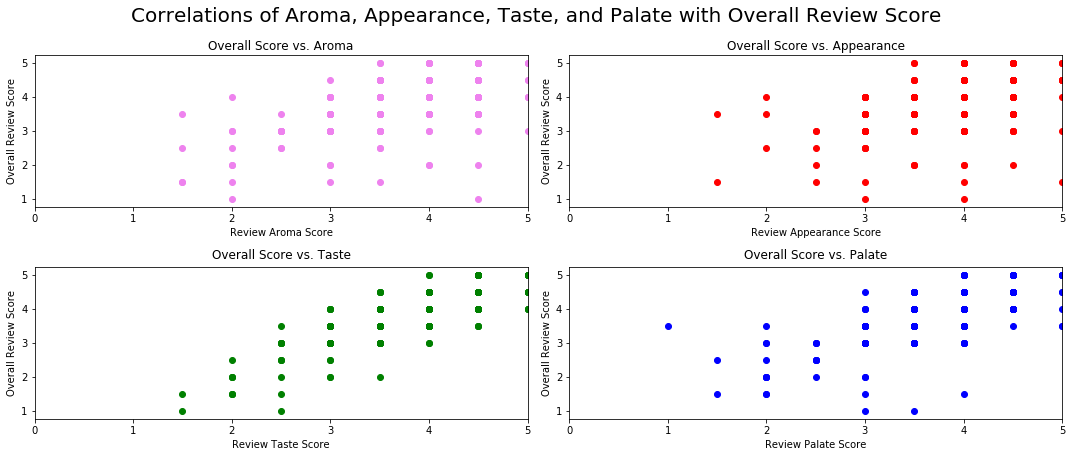

In [27]:
## subset DataFrame
beer_cor = beers_with_origin[['review_overall','review_aroma','review_appearance','review_palate','review_taste']]
beer_cor_sample = beer_cor.sample(300)

fig, axes = plt.subplots(2, 2, figsize=(15,6))

fig.suptitle("Correlations of Aroma, Appearance, Taste, and Palate with Overall Review Score", fontsize = 20, y = 1.05)

axes[0,0].scatter(beer_cor_sample['review_aroma'],beer_cor_sample['review_overall'], c = 'violet')
axes[0,0].set_xlabel('Review Aroma Score')
axes[0,0].set_ylabel('Overall Review Score')
axes[0,0].set_title('Overall Score vs. Aroma')
axes[0,0].set_xlim([0,5])

axes[0,1].scatter(beer_cor_sample['review_appearance'],beer_cor_sample['review_overall'], c = 'red')
axes[0,1].set_xlabel('Review Appearance Score')
axes[0,1].set_ylabel('Overall Review Score')
axes[0,1].set_title('Overall Score vs. Appearance')
axes[0,1].set_xlim([0,5])

axes[1,0].scatter(beer_cor_sample['review_taste'],beer_cor_sample['review_overall'], c = 'green')
axes[1,0].set_xlabel('Review Taste Score')
axes[1,0].set_ylabel('Overall Review Score')
axes[1,0].set_title('Overall Score vs. Taste', y = 1.02)
axes[1,0].set_xlim([0,5])

axes[1,1].scatter(beer_cor_sample['review_palate'],beer_cor_sample['review_overall'], c = 'blue')
axes[1,1].set_xlabel('Review Palate Score')
axes[1,1].set_ylabel('Overall Review Score')
axes[1,1].set_title('Overall Score vs. Palate', y = 1.02)
axes[1,1].set_xlim([0,5])

plt.tight_layout()

plt.show()

So it looks like each of these attributes has a positive linear relationship with the overall score, which is a big ol' **DUH**. But, we can also see that the scatterplot for taste and palate are more tightly grouped together along an imaginary linear regression line compared to appearance and aroma, suggesting that these 2 attributes are more likely to play a role in the overall review score of a beer. 

This seems like it would go along with most people's intuition. I would say I personally care more that my beer tastes better and that the palate is better (think of palate as the way the beer feels as you swallow and it goes down, i.e. the smoothness, texture, alcohol content, etc.) than if it doesn't look or smell particularly rosy.

For instance, my favorite scotches smell (and taste, in fact) like an old fireplace, which really isn't as pleasant of a smell as, say, a nice bonfire, but they tend to be the spirits I enjoy the most.

Now, after looking at the scatterplot, we look at the actual correlation matrix to see the *r* values between each of these attributes and the overall review score.

In [28]:
beer_cor.corr()

,review_overall,review_aroma,review_appearance,review_palate,review_taste
review_overall,1.000000,0.617218,0.503314,0.702543,0.790279
review_aroma,0.617218,1.000000,0.562597,0.618298,0.717849
review_appearance,0.503314,0.562597,1.000000,0.568477,0.548749
review_palate,0.702543,0.618298,0.568477,1.000000,0.735103
review_taste,0.790279,0.717849,0.548749,0.735103,1.000000


So indeed, we can see that taste has the highest Pearson's coefficient of correlation value of r = 0.790279, suggesting that the taste of a beer has the highest effect on the overall review score, followed by palate with its r value of 0.702543. I'd say that both of these value are between "moderate" to "strong" correlations, while aroma is closer to moderate with r = 0.617218, followed by the even-more-moderate appearance value of 0.503314, suggesting that beeradvocate.com users care less about how their beer looks and smells than how is tastes and feels, which I would think would be an obvious hypothesis.

<h1> Conclusion </h1>

So, from my analyses above, we can come to 3 conclusions about beer, according to beeradvocate.com user reviews:

* Of beers with styles originating from the United States of America, Belgium, and Germany, the highest-quality beers tend to come from Belgium, followed by the United States, and ending with Germany, taking into account that German beers were still quite highly rated (median score of ~3.8).
* While the craft beer culture has been improving, it seems that the average score of beers with styles originating from the United States were quite high in the mid-90's, but has since declined, excluding a slow increase from 2002 to 2009
* The attributes of a beer that are most important to its overall review score are it's taste and palate, whilst aroma and appearance are not as large of factors